In [87]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
#importing data set
crime=pd.read_csv("/content/crime_data.csv")

In [89]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [90]:
crime = crime.rename({'Unnamed: 0':'State'}, axis = 1)

In [91]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [92]:
crime.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

AGGLOMERATIVE CLUSTERING

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(crime.iloc[:,1:])
print(scaler_data)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

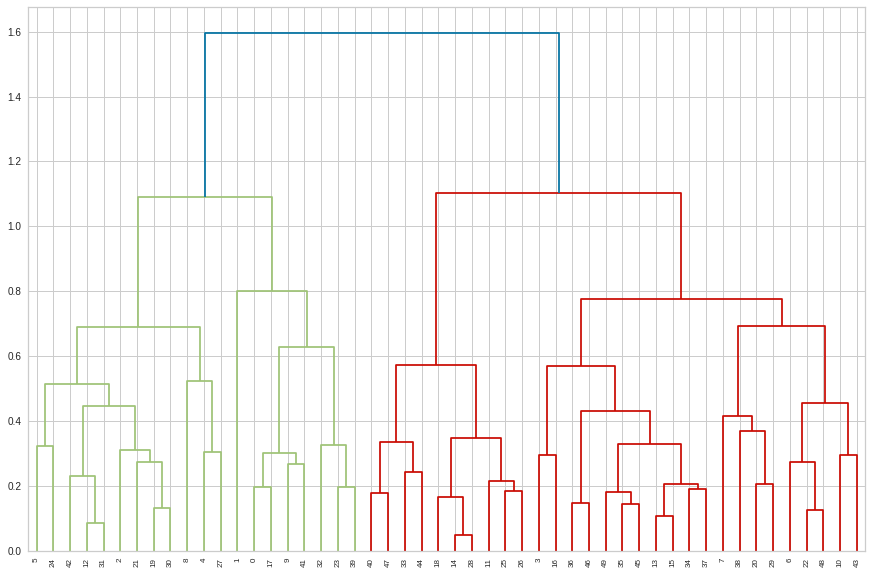

In [94]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 10))  
dendograms=sch.dendrogram(sch.linkage(scaler_data,'complete'))

In [95]:
#Portion in the dendogram in which rectangle having maximum height and not crossing any vertical dendogram line is found (blue and orange one).
# Observed no. of clusters are 4. 
# Max-Height rectangle is choosen on the basis of max_Euclidean distance to get optimal no. of clusters

In [96]:
from sklearn.cluster import AgglomerativeClustering
clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [97]:
y=pd.DataFrame(clusters.fit_predict(scaler_data),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    18
1    13
2    12
3     7
Name: clustersid, dtype: int64

In [98]:
crime['clustersid_HC']=clusters.labels_
crime

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [99]:
crime.groupby('clustersid_HC').agg(['mean']).reset_index()

,clustersid_HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


In [100]:
#Here we have grouped the data into 4 clusters using aggragate function as mean.

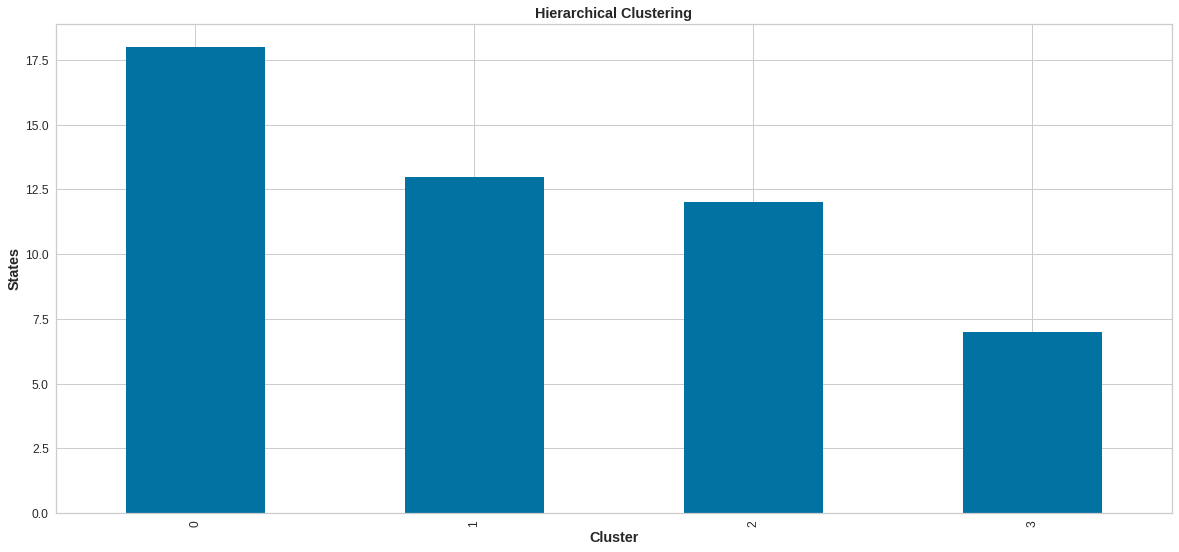

In [101]:
fig, ax = plt.subplots(figsize=(20, 9))
crime.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Cluster', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [102]:
#From this bar plot we can say that there are more no.of states such as hawai,indiana,kansas are grouped into first cluster 
#and less no of states such as mississippi , north carolina are lying in the fourth cluster

In [103]:
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler_data, clusters.labels_)
sil_score

0.3298707379986785

In [104]:
#This score is used to calculate goodness of clustering technique
#As we got silhoutte score as 0.32 means clusters are indifferent

In [105]:
crime[crime['clustersid_HC']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [106]:
crime[crime['clustersid_HC']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [107]:
crime[crime['clustersid_HC']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [108]:
crime[crime['clustersid_HC']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [109]:
#Here we have individually seen states that are grouped into each cluster

K-MEAN

In [110]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

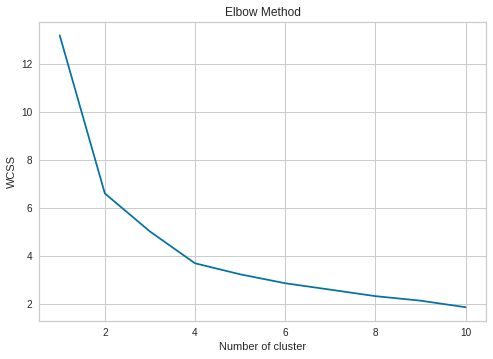

In [111]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_data)
    wcss.append(kmeans.inertia_)   
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [112]:
#From this visualization we cann see that there are two drops
#First drop at x=2
#Second drop at x=3 
#As we are looking for a point at which further there will be no high drops and rest of the data point will follow some pattern or may gradually decrease
#Hence the point at which the elbow shape is created is 4, that is, our K value or an optimal number of clusters is 4.

In [113]:
Kmean = KMeans(4, random_state=42)
Kmean.fit(scaler_data)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [114]:
y=pd.DataFrame(Kmean.fit_predict(scaler_data),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [115]:
crime['clusterid_Kmeans'] = Kmean.labels_
crime

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [116]:
crime.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,clustersid_HC
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.846154
1,1,10.966667,264.000000,76.500000,33.608333,1.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


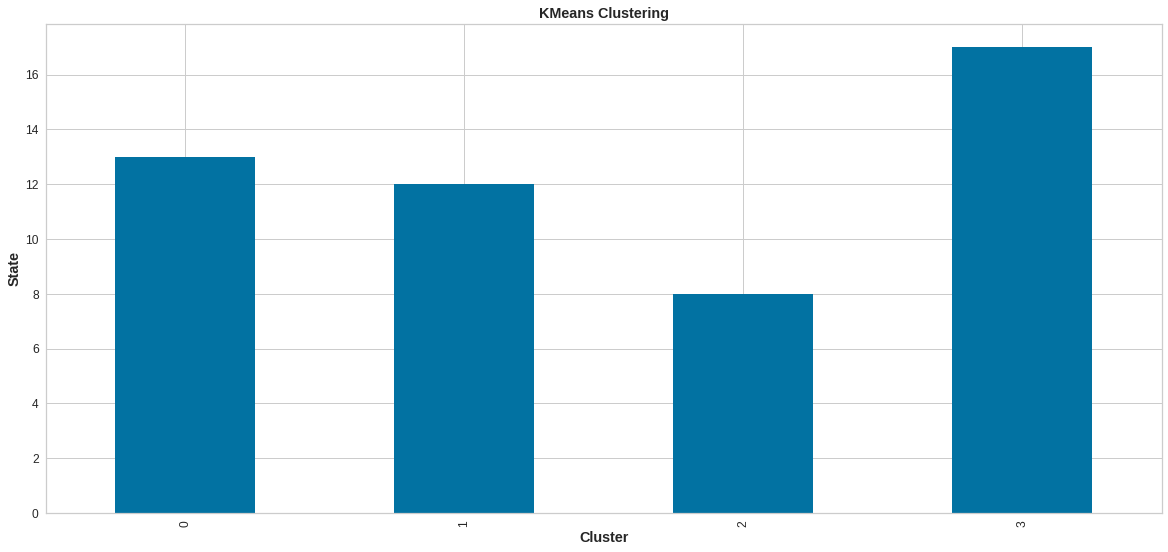

In [117]:
fig, ax = plt.subplots(figsize=(20, 9))
crime.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('State')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Cluster', fontsize='large', fontweight='bold')
ax.set_ylabel('State', fontsize='large', fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [118]:
#After applying k-Means clustering method we can see that more no.of states have been grouped into fourth cluster 
# and less no.of states grouped into third cluster

In [119]:
crime[crime['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,2,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [120]:
crime[crime['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [121]:
crime[crime['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


In [122]:
crime[crime['clusterid_Kmeans']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
10,Hawaii,5.3,46,83,20.2,0,3
13,Indiana,7.2,113,65,21.0,0,3
15,Kansas,6.0,115,66,18.0,0,3
20,Massachusetts,4.4,149,85,16.3,0,3
24,Missouri,9.0,178,70,28.2,1,3
29,New Jersey,7.4,159,89,18.8,0,3
34,Ohio,7.3,120,75,21.4,0,3
35,Oklahoma,6.6,151,68,20.0,0,3


In [123]:
#Here we have grouped all the states individually into each cluster 

DBSCAN

In [124]:
from sklearn.cluster import DBSCAN

EPS = [0.23, 0.25, 0.27,0.29, 0.30]

In [125]:
for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_data)
    y=pd.DataFrame(dbscan.fit_predict(scaler_data),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    sil_score= silhouette_score(scaler_data, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.23 
 -1    30
 0    20
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.23 
 0.27524171246235535
For eps = 0.25 
  1    25
-1    18
 0     4
 2     3
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.25 
 0.11957404878685067
For eps = 0.27 
  1    29
-1    13
 0     4
 2     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.27 
 0.1809726545905073
For eps = 0.29 
  2    29
-1     8
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.29 
 0.2609122917630667
For eps = 0.3 
  1    37
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.3 
 0.2473858809927262


In [126]:
dbscan = DBSCAN(eps=0.29, min_samples=4)
dbscan.fit(scaler_data)

DBSCAN(eps=0.29, min_samples=4)

In [127]:
crime['clusterid_DBSCAN'] = dbscan.labels_
crime.head()

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,1
3,Arkansas,8.8,190,50,19.5,0,2,2
4,California,9.0,276,91,40.6,1,1,-1


In [128]:
crime.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500,1.000000,1.62500
1,0,14.216667,258.000000,53.333333,21.000000,3.000000,2.00000
2,1,11.014286,262.571429,77.142857,28.800000,1.000000,1.00000
3,2,4.962069,114.724138,62.896552,16.224138,0.862069,1.62069


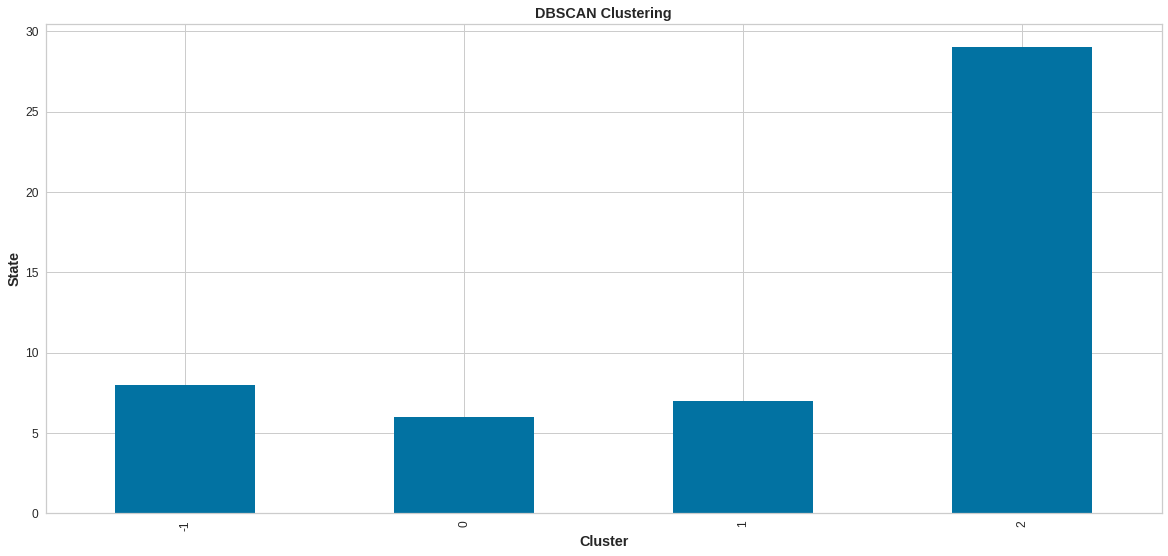

In [129]:
fig, ax = plt.subplots(figsize=(20, 9))
crime.groupby(['clusterid_DBSCAN']).count()['State'].plot(kind='bar')
plt.ylabel('ID Count')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Cluster', fontsize='large', fontweight='bold')
ax.set_ylabel('State', fontsize='large', fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [130]:
crime[crime['clusterid_DBSCAN']==-1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,1,1,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
7,Delaware,5.9,238,72,15.8,0,3,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,3,2,-1
10,Hawaii,5.3,46,83,20.2,0,3,-1
27,Nevada,12.2,252,81,46.0,1,1,-1


In [131]:
crime[crime['clusterid_DBSCAN']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
17,Louisiana,15.4,249,66,22.2,3,2,0
23,Mississippi,16.1,259,44,17.1,3,2,0
32,North Carolina,13.0,337,45,16.1,3,2,0
39,South Carolina,14.4,279,48,22.5,3,2,0
41,Tennessee,13.2,188,59,26.9,3,2,0


In [132]:
crime[crime['clusterid_DBSCAN']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1,1,1
12,Illinois,10.4,249,83,24.0,1,1,1
19,Maryland,11.3,300,67,27.8,1,1,1
21,Michigan,12.1,255,74,35.1,1,1,1
30,New Mexico,11.4,285,70,32.1,1,1,1
31,New York,11.1,254,86,26.1,1,1,1
42,Texas,12.7,201,80,25.5,1,1,1


In [133]:
crime[crime['clusterid_DBSCAN']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,0,2,2
6,Connecticut,3.3,110,77,11.1,0,3,2
11,Idaho,2.6,120,54,14.2,2,0,2
13,Indiana,7.2,113,65,21.0,0,3,2
14,Iowa,2.2,56,57,11.3,2,0,2
15,Kansas,6.0,115,66,18.0,0,3,2
16,Kentucky,9.7,109,52,16.3,0,0,2
18,Maine,2.1,83,51,7.8,2,0,2
20,Massachusetts,4.4,149,85,16.3,0,3,2
22,Minnesota,2.7,72,66,14.9,2,0,2


In [140]:
#Evaluation Metric
from sklearn import metrics
SC=metrics.silhouette_score(scaler_data, dbscan.labels_)
print("Silhouette Coefficient:%0.2f"%SC)

Silhouette Coefficient:0.26
